In [1]:
%matplotlib inline
import glob
import os
import librosa
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

from matplotlib.pyplot import specgram

In [453]:
# https://www.youtube.com/watch?v=MhOdbtPhbLU
# see if I can get one of these for conv layers
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    # spectogram
    stft = np.abs(librosa.stft(X))
      
#     melspec2 = librosa.feature.melspectrogram(X, n_mels = 60, sr=sample_rate)
#     logspec2 = librosa.logamplitude(melspec2)
#     logspec2 = logspec2.T.flatten()[:, np.newaxis].T
    print( librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels = 80 ).shape)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            print(fn)
            try:
                mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
                print( "Error encountered while parsing file: ", fn)
                continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [454]:
tr_features = np.load('tr_features.npy')
tr_labels = np.load('tr_labels.npy')



In [455]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout,Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [481]:

from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best_nn.hdf5', verbose=1, 
                               save_best_only=True)

# create model
model = Sequential()

model.add(Dense(8, input_dim=193, activation='relu',  kernel_regularizer=regularizers.l2(0.06),bias_regularizer=regularizers.l2(0.06)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu',  kernel_regularizer=regularizers.l2(.5),bias_regularizer=regularizers.l2(.5)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# ,  kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01)
model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.3),bias_regularizer=regularizers.l2(0.3)))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Fit the model
history = model.fit(tr_features, tr_labels, epochs=500,shuffle=True, batch_size=400, validation_split=0.25,
             callbacks=[checkpointer], verbose=0)

Epoch 00000: val_loss improved from inf to 10.49808, saving model to model.weights.best_nn.hdf5
Epoch 00001: val_loss improved from 10.49808 to 9.02862, saving model to model.weights.best_nn.hdf5
Epoch 00002: val_loss improved from 9.02862 to 7.78712, saving model to model.weights.best_nn.hdf5
Epoch 00003: val_loss improved from 7.78712 to 6.69284, saving model to model.weights.best_nn.hdf5
Epoch 00004: val_loss improved from 6.69284 to 5.72417, saving model to model.weights.best_nn.hdf5
Epoch 00005: val_loss improved from 5.72417 to 4.86488, saving model to model.weights.best_nn.hdf5
Epoch 00006: val_loss improved from 4.86488 to 4.10741, saving model to model.weights.best_nn.hdf5
Epoch 00007: val_loss improved from 4.10741 to 3.44519, saving model to model.weights.best_nn.hdf5
Epoch 00008: val_loss improved from 3.44519 to 2.86968, saving model to model.weights.best_nn.hdf5
Epoch 00009: val_loss improved from 2.86968 to 2.37318, saving model to model.weights.best_nn.hdf5
Epoch 00010:

Epoch 00139: val_loss did not improve
Epoch 00140: val_loss did not improve
Epoch 00141: val_loss did not improve
Epoch 00142: val_loss did not improve
Epoch 00143: val_loss did not improve
Epoch 00144: val_loss improved from 0.31364 to 0.31340, saving model to model.weights.best_nn.hdf5
Epoch 00145: val_loss improved from 0.31340 to 0.31249, saving model to model.weights.best_nn.hdf5
Epoch 00146: val_loss did not improve
Epoch 00147: val_loss improved from 0.31249 to 0.30993, saving model to model.weights.best_nn.hdf5
Epoch 00148: val_loss did not improve
Epoch 00149: val_loss did not improve
Epoch 00150: val_loss did not improve
Epoch 00151: val_loss did not improve
Epoch 00152: val_loss did not improve
Epoch 00153: val_loss did not improve
Epoch 00154: val_loss did not improve
Epoch 00155: val_loss did not improve
Epoch 00156: val_loss did not improve
Epoch 00157: val_loss did not improve
Epoch 00158: val_loss did not improve
Epoch 00159: val_loss did not improve
Epoch 00160: val_lo

Epoch 00339: val_loss did not improve
Epoch 00340: val_loss did not improve
Epoch 00341: val_loss did not improve
Epoch 00342: val_loss did not improve
Epoch 00343: val_loss did not improve
Epoch 00344: val_loss did not improve
Epoch 00345: val_loss did not improve
Epoch 00346: val_loss did not improve
Epoch 00347: val_loss did not improve
Epoch 00348: val_loss did not improve
Epoch 00349: val_loss did not improve
Epoch 00350: val_loss improved from 0.29466 to 0.29439, saving model to model.weights.best_nn.hdf5
Epoch 00351: val_loss did not improve
Epoch 00352: val_loss did not improve
Epoch 00353: val_loss did not improve
Epoch 00354: val_loss did not improve
Epoch 00355: val_loss did not improve
Epoch 00356: val_loss did not improve
Epoch 00357: val_loss did not improve
Epoch 00358: val_loss did not improve
Epoch 00359: val_loss did not improve
Epoch 00360: val_loss did not improve
Epoch 00361: val_loss did not improve
Epoch 00362: val_loss did not improve
Epoch 00363: val_loss did n

Epoch 00541: val_loss did not improve
Epoch 00542: val_loss did not improve
Epoch 00543: val_loss did not improve
Epoch 00544: val_loss did not improve
Epoch 00545: val_loss did not improve
Epoch 00546: val_loss did not improve
Epoch 00547: val_loss did not improve
Epoch 00548: val_loss did not improve
Epoch 00549: val_loss did not improve
Epoch 00550: val_loss did not improve
Epoch 00551: val_loss did not improve
Epoch 00552: val_loss did not improve
Epoch 00553: val_loss did not improve
Epoch 00554: val_loss did not improve
Epoch 00555: val_loss did not improve
Epoch 00556: val_loss did not improve
Epoch 00557: val_loss did not improve
Epoch 00558: val_loss did not improve
Epoch 00559: val_loss did not improve
Epoch 00560: val_loss did not improve
Epoch 00561: val_loss did not improve
Epoch 00562: val_loss did not improve
Epoch 00563: val_loss did not improve
Epoch 00564: val_loss did not improve
Epoch 00565: val_loss did not improve
Epoch 00566: val_loss did not improve
Epoch 00567:

Epoch 00755: val_loss did not improve
Epoch 00756: val_loss did not improve
Epoch 00757: val_loss did not improve
Epoch 00758: val_loss did not improve
Epoch 00759: val_loss did not improve
Epoch 00760: val_loss did not improve
Epoch 00761: val_loss did not improve
Epoch 00762: val_loss did not improve
Epoch 00763: val_loss did not improve
Epoch 00764: val_loss did not improve
Epoch 00765: val_loss did not improve
Epoch 00766: val_loss did not improve
Epoch 00767: val_loss did not improve
Epoch 00768: val_loss did not improve
Epoch 00769: val_loss did not improve
Epoch 00770: val_loss did not improve
Epoch 00771: val_loss did not improve
Epoch 00772: val_loss did not improve
Epoch 00773: val_loss did not improve
Epoch 00774: val_loss did not improve
Epoch 00775: val_loss did not improve
Epoch 00776: val_loss did not improve
Epoch 00777: val_loss did not improve
Epoch 00778: val_loss did not improve
Epoch 00779: val_loss did not improve
Epoch 00780: val_loss did not improve
Epoch 00781:

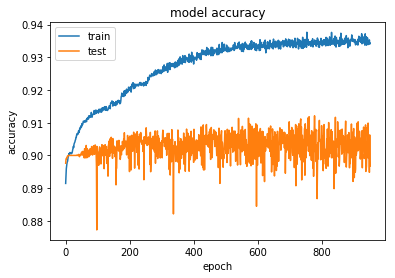

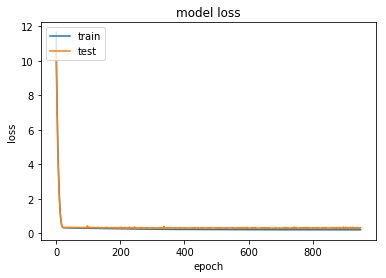

7197/7197 [==============================] - 0s     

 Training Accuracy: 0.937835233989


In [482]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best_nn.hdf5')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluating the model on the training and testing set
score = model.evaluate(tr_features, tr_labels)
print("\n Training Accuracy:", score[1])
# score = model.evaluate(X_test, y_test)
# print("\n Testing Accuracy:", score[1])

In [2]:
parent_dir = 'data'
tf_sub_dirs=['my_data']

tf_features, tf_labels = parse_audio_files(parent_dir,tf_sub_dirs)


tf_labels = np.array([[1,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0]])
print(tf_features.shape, tf_labels.shape)
# tf_labels = one_hot_encode(tf_labels)
# print(tf_features.shape,tf_labels.shape)
predictions = model.predict(tf_features)
np.argmax(predictions, axis=1)

NameError: name 'parse_audio_files' is not defined

(60, 109)
